In [12]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
import copy

from pickle import dump
from pickle import load
from pandas.plotting import scatter_matrix

In [ ]:
dataset = pd.read_excel("Data/SCFP2009panel.xlsx")

In [7]:
average_sp500_2007 = 1478
average_sp500_2009 = 948

"""Risk Tolerance for 2007"""

dataset['RiskFree07'] = dataset['LIQ07'] + dataset['CDS07'] + \
    dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + \
    dataset['STOCKS07'] + dataset['BOND07']
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

"""Risk Tolerance for 2009"""

dataset['RiskFree09'] = dataset['LIQ09'] + dataset['CDS09'] + \
    dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + \
    dataset['STOCKS09'] + dataset['BOND09']
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09']) * (average_sp500_2007/average_sp500_2009)

In [8]:
dataset2 = copy.deepcopy(dataset)
dataset2.head()

dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

print('Null Values =',dataset2.isnull().values.any())

Null Values = True


/Users/vikram/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RT09'>

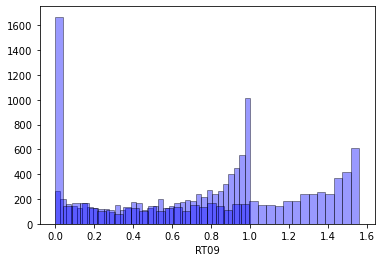

In [9]:
dataset2=dataset2.dropna(axis=0)
dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]

sns.distplot(dataset2['RT07'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})
sns.distplot(dataset2['RT09'], hist=True, kde=False, bins=int(180/5), color = 'blue', hist_kws={'edgecolor':'black'})

<AxesSubplot:title={'center':'Correlation Matrix'}>

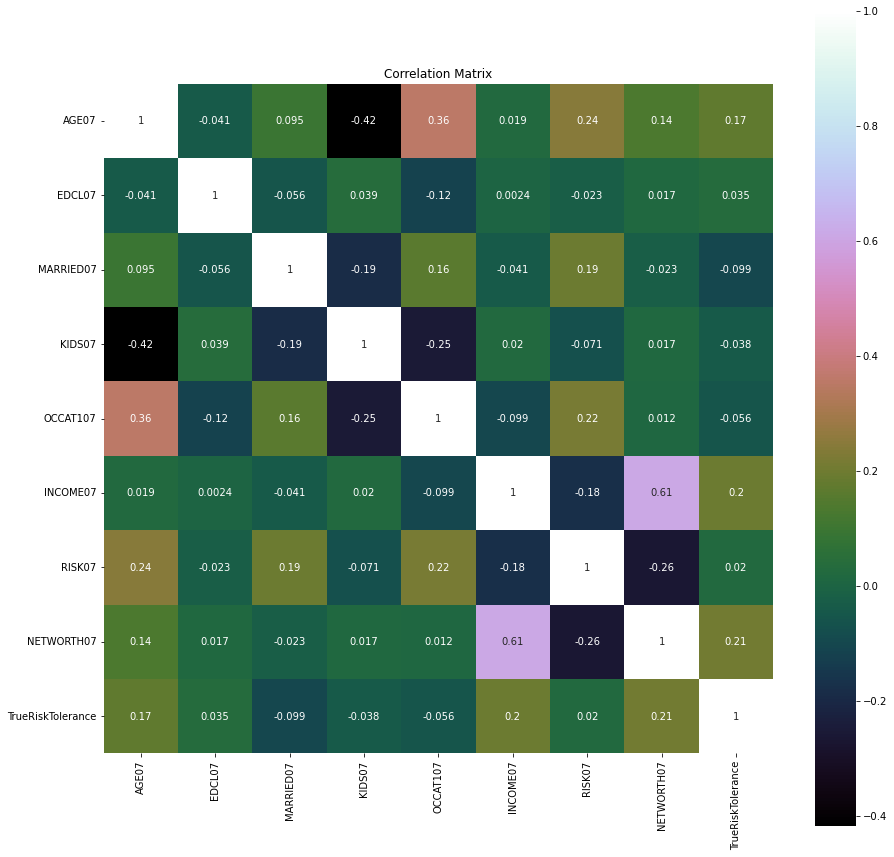

In [11]:
dataset3 = copy.deepcopy(dataset2)
dataset3 = dataset3[dataset3['PercentageChange']<=.1]

dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

correlation = dataset3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')



<Figure size 1080x1080 with 0 Axes>

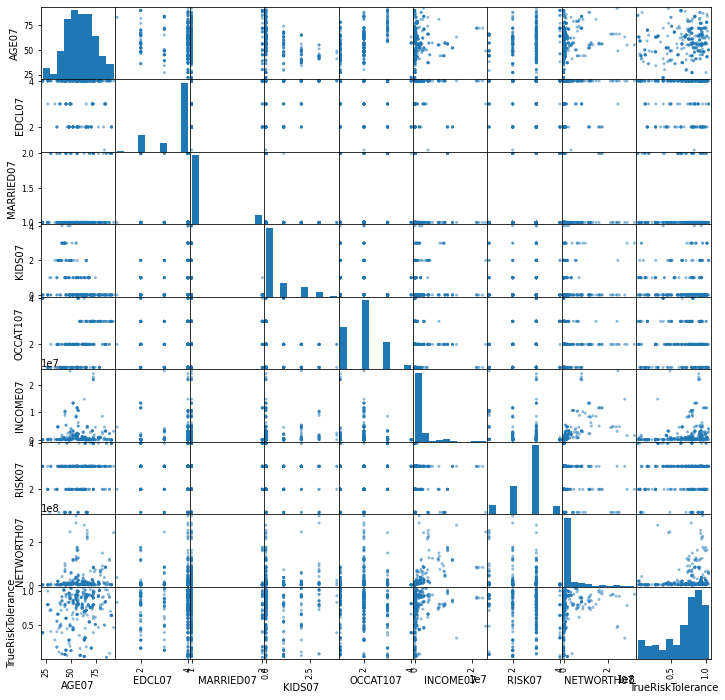

In [15]:
plt.figure(figsize=(15,15))
scatter_matrix(dataset3,figsize=(12,12))
plt.show()

